# Demonstration of Animated Graph In the Context of Heat Diffusion
This exercise demonstrates how one can compute 1-dimensional heat flux through conduction and how this leads to the "diffusion" of heat discontinuities.

## Numerical computations
The first part of the exercise performs all the computations. 
### Import Numpy Library

In [1]:
#If running in a Colab notebook, start the notebook, then remove the hashtags on the following lines
#!git clone https://github.com/jwlauer/EnvironmentalSensing.git
#%cd EnvironmentalSensing/AnalysisCode/DiffusionAnimation

In [2]:
import numpy as np

### Set parameters
Here the main constants and physical parameters used in the solution are specified.

In [3]:
dx = 0.05    #length of spatial step
L = 2        #length of bar in meters
dt = 10       #seconds
tmax = 4000   #seconds
k = 100       #J/s/m/K
c = 1000      #J/kg/K
rho = 2000   #density, kg/m3
kappa = k/(c*rho) #diffusion coef

### Specify initial and boundary conditions

The temperature at either end of the bar and across the entire bar at the beginning of the computation must be set before the solution can be computed.

In [4]:
T0 = 50      #initial condition, degrees C
Tleft = 100    #left boundary, degrees C
Tright = 0 #right boundary, degrees C

### Define and initialize grid
The values of x at which computations occur are set up using the spatial step dx that we set previously.  We also set up times when we will perform the computation using the dt we set previously.

In [5]:
x = np.arange(0,L+dx,dx)
t = np.arange(0,tmax+dt,dt)

We will also need ot know the maximum index for the columns (i.e, the number of x values where we do computations) and the maximum index for the number of rows (i.e., the number of timesteps where we do computations).

In [6]:
rowmax = int(tmax/dt)
columnmax = int(L/dx)

Create an array of empty temperature values.  Here, we'll just set up an array of "1s" using a command in numpy defined for this purpose.

In [7]:
T=np.ones((rowmax+1,columnmax+1))

Set initial conditions.  Here, the temperature is now re-set to the initial value we set when we defined parameters.

In [8]:
T[0,...]=T0

Set boundary conditions.  Here, we have two boundaries, one on the left said and one on the right.  We set these given the parameters that were entered previously.

In [9]:
T[...,0] = Tleft
T[...,columnmax] = Tright

### Perform computations  
Here, we recursively compute the value for temperature T for all non-boundary and non-initial value cells in the table. The iteration occurs in a loop that eventually runs through every cell for which a computation is needed.

In [10]:
#start at row 0 and go to the last row
for i in range(0,rowmax):   
    #start at column 1 and go to the last column
    for m in range(1,columnmax):  
        T[i+1,m]=T[i,m]+ kappa * dt/dx**2*(T[i,m+1]-2*T[i,m]+T[i,m-1])


## Graph the results
Now that computations are complete, we have a two-dimensional array with all the results we need.  All that is left is to graph them.
### Import graphing libraries

In [11]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

### Create plot of T vs t at x = 95, 50, and 5 cm

Text(0.5, 0, 'Time (s)')

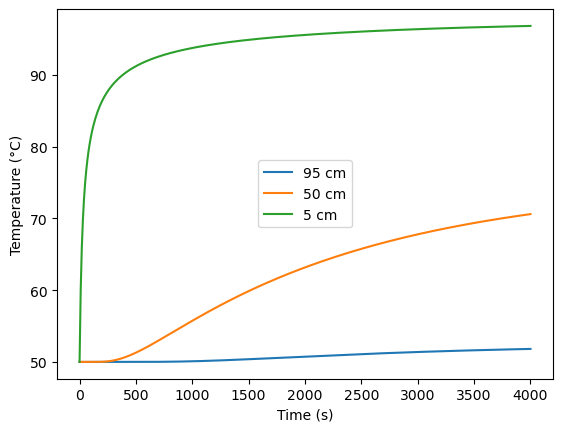

In [12]:
fig1 = plt.figure()
subfig = fig1.add_subplot(1, 1, 1)
line, = subfig.plot(t,T[:,19],label='95 cm')
line2, = subfig.plot(t,T[:,10],label='50 cm')
line3, = subfig.plot(t,T[:,1],label='5 cm')
subfig.legend()
plt.ylabel('Temperature (°C)')
plt.xlabel('Time (s)')

### Create plot of T vs x at t = 5, 10, 30, and 60 minutes

Text(0.5, 0, 'x (m)')

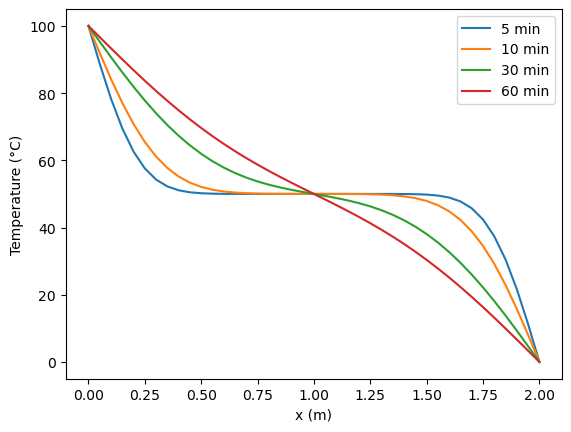

In [13]:
#Create plot of T vs x at t = 5, 10, 30, and 60 minutes
fig2 = plt.figure()
subfig = fig2.add_subplot(1, 1, 1)
line, = subfig.plot(x,T[int(5*60/dt),:],label='5 min')
line2, = subfig.plot(x,T[int(10*60/dt),:],label='10 min')
line3, = subfig.plot(x,T[int(30*60/dt),:],label='30 min')
line4, = subfig.plot(x,T[int(60*60/dt),:],label='60 min')
subfig.legend()
plt.ylabel('Temperature (°C)')
plt.xlabel('x (m)')

### Compare with observed data
Here, to illustrate the process, we import data from a textfile and then add that to the previous graph. We also add a label to these data points indicating they were supposed to have been measured at t=10 minutes. Note that the x values that are added here would need to have been measured when the experiment was performed.  The x values represent all points where temperatures were measured.

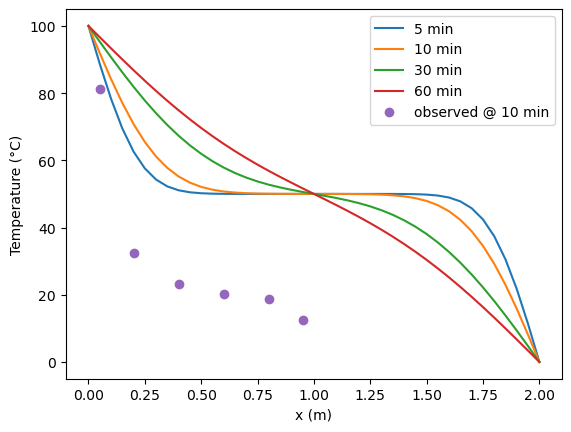

In [14]:
#import data 
ObservedT = np.genfromtxt('instructor.txt', delimiter=',', skip_header=1)
#define x values
x_instructor = np.array([0.05, 0.2,0.4, 0.6, 0.8, 0.95])
line5, = subfig.plot(x_instructor, ObservedT[62,1:7],'o', label = 'observed @ 10 min')
subfig.legend()
fig2

### Create an animation
The animation requires the generation of a figure that gets saved to the animation at regular intervals.

Start the backend that allows for external graphs. The animation will not be visible in the notebook.

In [15]:
%matplotlib notebook 
#%matplotlib auto
#%matplotlib nbagg

Create and format the figure that will be animated. This performs all work on the initial condition.

Note that if we want to later be  able to animate the plot, we have to create a handle for the object on the graph that will change.  In this case, that is the blue line on the graph, which technically is an object created by the matplotlib ax.plot() function. Here, we have created a variable called "line" that stores this object and allows us to access it later.  

In [16]:
fig3 = plt.figure()
subfig = fig3.add_subplot(1, 1, 1)
line, = subfig.plot(x,T[0,:])
subfig.set_ylabel('Temperature (°C)')
subfig.set_xlabel('distance (m)')
#fig3.tight_layout()
#fig3.set_size_inches(4,3)

<IPython.core.display.Javascript object>

Text(0.5, 0, 'distance (m)')

#### Pad output array

In order to have a nice animation, we want the animation to stay still at the beginning and end while the viewer gets oriented to the figure. In theory, there is an argument in the Matplotlib animation library for pausing, but it does not render appropriately.  So, a work around is to pad the input array with a number of constant rows at the beginning and end.  We also pad the time array with time 0 at the beginning and the maximum simulation time a the ned.  Here, we'll add 50 rows representing the initial conditions to at the start of our temperature array, and 50 rows of final conditions at the end.

In [17]:
T = np.pad(T,((50,50),(0,0)),'edge')
t = np.pad(t,50,'edge')

#### Set up animation
Now we are ready to actually change the properties of the graph within a loop and save each graph to the animation.

To do this, we create a function that will update the figure at regular intervals. In the function, we will update the y property of the line object that we previously defined in our graph. Updating these values will cause the line to change its position on the chart.  We also update the title so that we will be able to track the time into the simulation.  

We are doing this concisely by creating a function that updates the line to its correct position as a function of the index i (which is what we use to keep track of which frame we are on), the x values of the line (acutally not used here, but included to make it simpler to modify the function later if you wish to pass different sets of x- and y- values for each frame), the temperature array T (used to set the y values--we have a set of T values for each index i), and the time in the simulation (used in the title). The function has to return the line object, which gets re-rendered in the figure by the animation tool for each step in the animation loop.

We then create the animation object (called "ani" here) using a special function that is part of matplotlibs "FuncAnimation" library. We tell it that we want our animation to apply to our "fig3" object. We also pass the function that updates the things in the figure that we want to change for each frame number (with index i), and we also pass the variables we would need in order to make the plot (so function arguments fargs x, T, and t--although we don't use x here). We then set several parameters needed by the animation function. Here, we pass the time interval between frames (milliseconds), a flag specifying whether the animation repeats when done, the total number of steps to include in the animation, the delay (milliseconds) after an animation is done before repeating, and a flag (blit) to tell the system not to re-write parts of the figure that are not changing.



In [18]:
# This function is called periodically from FuncAnimation
def animate(i, x, T, t):
    #line.set_xdata(x) #not needed here, but included to make function easier to modify
    line.set_ydata(T[i,:]) #update data in plot using index i
    plt.title(f'Time = {t[i]:.2f} seconds') # Format Title  with time in it
    return line, #it is necessary to return this

# Set up plot to call animate() function periodically
ani = FuncAnimation(fig3, animate, fargs=(x, T, t), 
                    interval=20, 
                    repeat=True, 
                    save_count=len(t)-1, 
                    #repeat_delay=2000, #does not work with PillowWriter
                    blit=True 
                    )
plt.show()

#### Save the file
Specify location of animation tool and where the animation will be saved.

In [ ]:
ani.save('animation.gif', writer=PillowWriter(fps=24))

The animation that is produced should now be saved in the project folder. The file is ready to be embedded in whatever document you like. If it works, it should look like the following:

<img src="animation.gif" width="500" align="left">




#### Add controllable animation to notebook
For use in the notebook, it can be nice to provide users with alternate controls.  This can be accomplished by changing a setting in the Jupyter notebook, then calling the animation again.

In [ ]:
plt.rcParams['animation.html'] = 'jshtml'
ani
